In [1]:
pip install snowflake_connector_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pyopenssl to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
  Attempting uninstall: pyOpenSSL
    Found ex

In [2]:
import pandas as pd
import snowflake.connector

con=snowflake.connector.connect(
    user='xx',
    password='xx@xx',
    account='xx-xx',
    database='xx',
    schema='PUBLIC',
    warehouse='COMPUTE_WH'

)

In [3]:
cursor = con.cursor()
cursor.execute("SELECT * FROM AUTO;")
df = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])
cursor.close()

True

In [4]:
df.head()

,SYMBOLING,MAKE,FUEL_TYPE,ASPIRATION,NUM_OF_DOORS,BODY_STYLE,DRIVE_WHEELS,ENGINE_LOCATION,WHEEL_BASE,LENGTH,...,ENGINE_SIZE,FUEL_SYSTEM,BORE,STROKE,COMPRESSION_RATIO,HORSEPOWER,PEAK_RPM,CITY_MPG,HIGHWAY_MPG,PRICE
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [7]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Apply Standard Scaling to numerical columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# Concatenate the processed dataframes
df_processed = pd.concat([df_scaled, df_encoded], axis=1)

print("Shape of original DataFrame:", df.shape)
print("Shape of processed DataFrame:", df_processed.shape)
print("\nHead of processed DataFrame:")
df_processed.head()

Shape of original DataFrame: (193, 25)
Shape of processed DataFrame: (193, 326)

Head of processed DataFrame:


,SYMBOLING,NUM_OF_DOORS,CURB_WEIGHT,NUM_OF_CYLINDERS,ENGINE_SIZE,COMPRESSION_RATIO,HORSEPOWER,PEAK_RPM,CITY_MPG,HIGHWAY_MPG,...,STROKE_3.46,STROKE_3.47,STROKE_3.50,STROKE_3.52,STROKE_3.54,STROKE_3.58,STROKE_3.64,STROKE_3.86,STROKE_3.90,STROKE_4.17
0,1.78685,-1.175889,-0.025713,-0.411247,0.045215,-0.215472,0.198569,-0.213359,-0.679053,-0.557058,...,False,False,False,False,False,False,False,False,False,False
1,1.78685,-1.175889,-0.025713,-0.411247,0.045215,-0.215472,0.198569,-0.213359,-0.679053,-0.557058,...,False,False,False,False,False,False,False,False,False,False
2,0.16397,-1.175889,0.497764,1.548523,0.575559,-0.215472,1.334283,-0.213359,-0.992963,-0.704134,...,False,True,False,False,False,False,False,False,False,False
3,0.97541,0.850420,-0.427362,-0.411247,-0.461021,0.035047,-0.039139,0.856208,-0.208189,-0.115832,...,False,False,False,False,False,False,False,False,False,False
4,0.97541,0.850420,0.499668,0.568638,0.189854,-0.465991,0.304217,0.856208,-1.149918,-1.292436,...,False,False,False,False,False,False,False,False,False,False


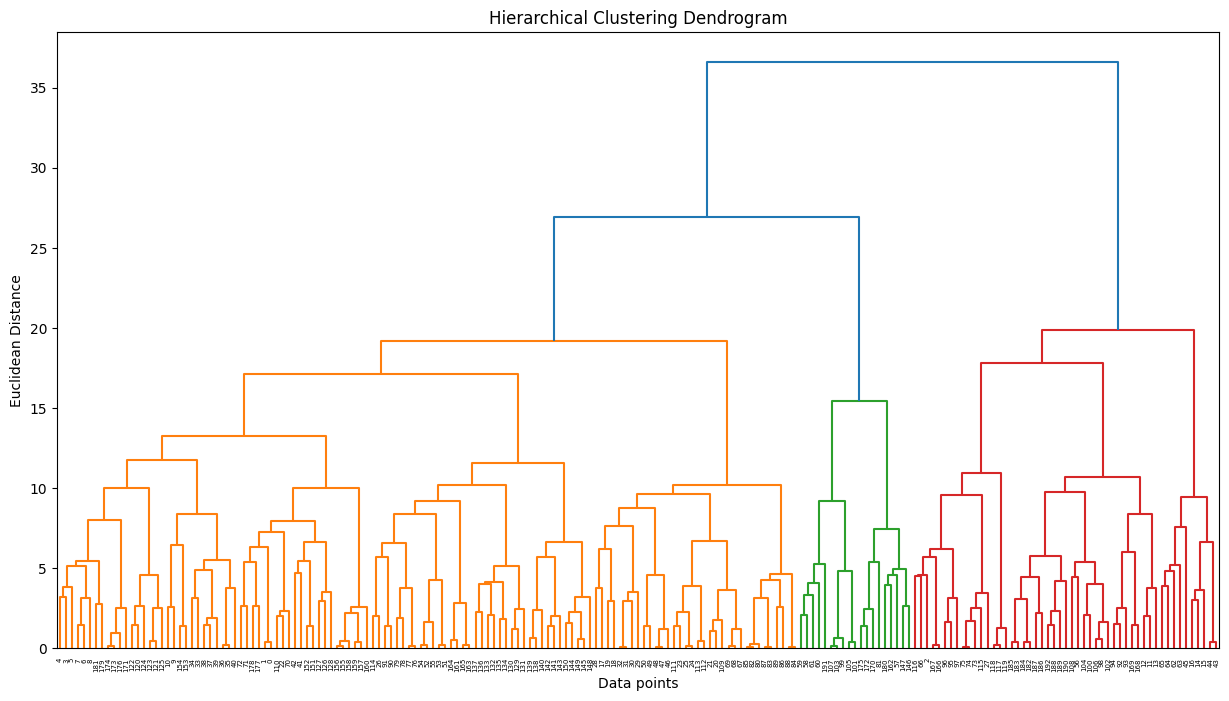

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
linked_data = linkage(df_processed, method='ward') # 'ward' minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked_data,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean Distance')
plt.show()